# By : PRASHANT

# Predicting the Startups Success/Profit rate using Multiple Linear Regression ML Algorithm

In [86]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
# LOADING DATASET
df = pd.read_csv('C:\\Users\\lenovo\\Desktop\\Startups.csv')

In [88]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [89]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [90]:
df.shape

(50, 5)

In [91]:
df.size

250

In [92]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [93]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [94]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [95]:
df.duplicated().sum()

0

In [96]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# Visualizing the dataset

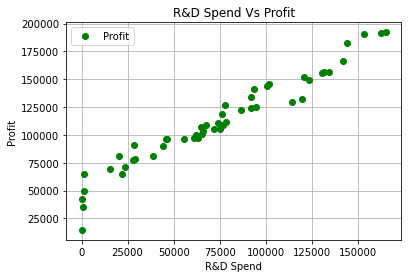

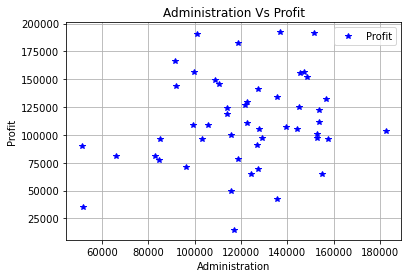

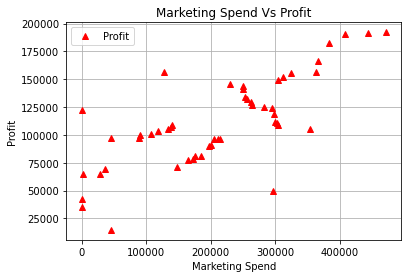

In [97]:
# plot 1
df.plot(x='R&D Spend',y='Profit',style='og')
plt.title("R&D Spend Vs Profit")
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.grid()
plt.show()

# plot 2
df.plot(x='Administration',y='Profit',style='*b')
plt.title("Administration Vs Profit")
plt.xlabel("Administration")
plt.ylabel("Profit")
plt.grid()
plt.show()

# plot 3
df.plot(x='Marketing Spend',y='Profit',style='^r')
plt.title("Marketing Spend Vs Profit")
plt.xlabel("Marketing Spend")
plt.ylabel("Profit")
plt.grid()
plt.show()

In [98]:
state_val = df.State.value_counts()

In [99]:
print(state_val)

California    17
New York      17
Florida       16
Name: State, dtype: int64


In [100]:
state_lab=['California','New York','Florida']

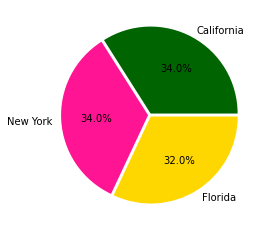

In [101]:
plt.pie(state_val,labels=state_lab,autopct='%0.1f%%',explode=[0.02,0.02,0.02],colors=['darkgreen','deeppink','gold'])
plt.show()

# encoding categorical data

In [102]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [111]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['State']=le.fit_transform(df['State'])
df['State'].unique()


array([2, 0, 1], dtype=int64)

In [112]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


# Train Data

In [113]:
X=df.drop('Profit',axis=1)
y=df['Profit']

In [117]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=12)

In [118]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(40, 4) (10, 4) (40,) (10,)


# Training Model

In [122]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
print("Training Completed")

Training Completed


# Predicting Test result

In [124]:
y_pred=lr.predict(X_test)

In [125]:
y_pred

array([ 99362.57365995,  57361.32091514, 158952.08757695,  76500.73217036,
        75559.68329929, 100910.19514917, 116784.13722194,  52267.45559814,
       114248.51362792, 151001.94791045])

In [132]:
df2=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df2

,Actual,Predicted
28,103282.38,99362.573660
46,49490.75,57361.320915
7,155752.60,158952.087577
41,77798.83,76500.732170
36,90708.19,75559.683299
29,101004.64,100910.195149
21,111313.02,116784.137222
48,35673.41,52267.455598
19,122776.86,114248.513628
8,152211.77,151001.947910


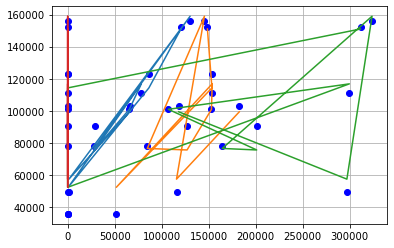

In [146]:
plt.plot(X_test,y_test,'ob')
plt.plot(X_test,y_pred)
plt.grid()
plt.show()

In [161]:
A=[[144000,130000,470000,2]]
b=lr.predict(A)
print(b[0])

175566.62706499913


In [162]:
lr.score(X_test,y_test)

0.9492627421151758